<a href="https://colab.research.google.com/github/RehanShabbir16/Modern_computer_vision_with_pytorch/blob/main/Cifar10_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
from torch.optim import Adam
import torch.nn as nn

In [2]:
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
!pip install torch_summary


In [3]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [4]:
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rehan05","key":"5a25aacb6e7a5cfa0bf5ff818d6e2ef1"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [6]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip


Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [7]:
train_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'


In [8]:
class cats_dogs(Dataset):
  def __init__(self, folder):
    cats = glob(folder + '/cats/*.jpg')
    dogs = glob(folder + '/dogs/*.jpg')
    self.fpaths = cats + dogs
    from random import shuffle,seed; seed(10);shuffle(self.fpaths)
    self.targets=[fpath.split('/')[-1].startswith('dog') for fpath in self.fpaths]
  def __len__(self):
    return len(self.fpaths)
  def __getitem__(self, ix):
    f = self.fpaths[ix]
    target = self.targets[ix]
    im = (cv2.imread(f)[:,:,::-1])
    im = cv2.resize(im, (224,224))
    return torch.tensor(im/255).permute(2,0,1).to(device).float(), torch.tensor([target]).float().to(device)

In [12]:
data=cats_dogs(train_data_dir)


In [15]:
import random

In [16]:
classes=['cat','dog']

Text(0.5, 1.0, 'cat')

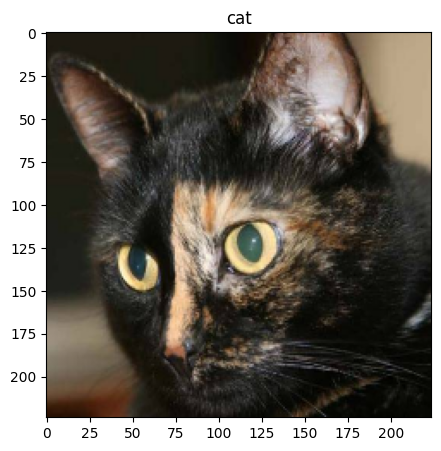

In [19]:
n=random.randint(0,len(data))
im,lable=data[n]
plt.figure(figsize=(5,5))
plt.imshow(im.permute(1,2,0).cpu())
plt.title(classes[int(lable)])

In [21]:
print(im.shape)

torch.Size([3, 224, 224])


In [27]:
def conv_layer(ni,no, kernel_size, stride=1):
  return nn.Sequential(
      nn.Conv2d(ni,no,kernel_size,stride),
      nn.ReLU(),
      nn.BatchNorm2d(no),
      nn.MaxPool2d(2)
  )

In [28]:
def get_model():
    model=nn.Sequential(
        conv_layer(3,64,3),
        conv_layer(64,512,3),
        conv_layer(512,512,3),
        conv_layer(512,512,3),
        conv_layer(512,512,3),
        conv_layer(512,512,3),
        nn.Flatten(),
        nn.Linear(512,1),
        nn.Sigmoid()
    ).to(device)
    loss_fn=nn.BCELoss()
    opt=Adam(model.parameters(),lr=0.001)
    return model,loss_fn,opt


In [29]:
from torchsummary import summary
model,loss_fn,opt=get_model()
summary(model,(3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 111, 111]        --
|    └─Conv2d: 2-1                       [-1, 64, 222, 222]        1,792
|    └─ReLU: 2-2                         [-1, 64, 222, 222]        --
|    └─BatchNorm2d: 2-3                  [-1, 64, 222, 222]        128
|    └─MaxPool2d: 2-4                    [-1, 64, 111, 111]        --
├─Sequential: 1-2                        [-1, 512, 54, 54]         --
|    └─Conv2d: 2-5                       [-1, 512, 109, 109]       295,424
|    └─ReLU: 2-6                         [-1, 512, 109, 109]       --
|    └─BatchNorm2d: 2-7                  [-1, 512, 109, 109]       1,024
|    └─MaxPool2d: 2-8                    [-1, 512, 54, 54]         --
├─Sequential: 1-3                        [-1, 512, 26, 26]         --
|    └─Conv2d: 2-9                       [-1, 512, 52, 52]         2,359,808
|    └─ReLU: 2-10                        [-1, 512, 52, 52]        

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 111, 111]        --
|    └─Conv2d: 2-1                       [-1, 64, 222, 222]        1,792
|    └─ReLU: 2-2                         [-1, 64, 222, 222]        --
|    └─BatchNorm2d: 2-3                  [-1, 64, 222, 222]        128
|    └─MaxPool2d: 2-4                    [-1, 64, 111, 111]        --
├─Sequential: 1-2                        [-1, 512, 54, 54]         --
|    └─Conv2d: 2-5                       [-1, 512, 109, 109]       295,424
|    └─ReLU: 2-6                         [-1, 512, 109, 109]       --
|    └─BatchNorm2d: 2-7                  [-1, 512, 109, 109]       1,024
|    └─MaxPool2d: 2-8                    [-1, 512, 54, 54]         --
├─Sequential: 1-3                        [-1, 512, 26, 26]         --
|    └─Conv2d: 2-9                       [-1, 512, 52, 52]         2,359,808
|    └─ReLU: 2-10                        [-1, 512, 52, 52]        

In [30]:
def get_data():
  trn_dl=cats_dogs(train_data_dir)
  trn_dl=DataLoader(trn_dl,batch_size=64,shuffle=True)
  return trn_dl

In [31]:
def train_batch(x,y,model,opt,loss_fn):
  model.train()
  pred=model(x)
  loss=loss_fn(pred,y)
  loss.backward()
  opt.step()
  opt.zero_grad()
  return loss.item()

In [32]:
@torch.no_grad()
def accuracy(x, y, model):
 prediction = model(x)
 is_correct = (prediction > 0.5) == y
 return is_correct.cpu().numpy().tolist()

In [33]:
trn_dl=get_data()
model,loss_fn,opt=get_model()

In [35]:
losses,accuracies=[],[]
for epoch in range(5):
  print(epoch)
  losses_epoch,accuracies_epoch=[],[]
  for ix,batch in enumerate(iter(trn_dl)):
    x,y=batch
    batch_loss=train_batch(x,y,model,opt,loss_fn)
    losses_epoch.append(batch_loss)
  train_epoch_loss = np.array(losses_epoch).mean()
  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    is_correct = accuracy(x, y, model)
    accuracies_epoch.extend(is_correct)
  accuracy_epoch = np.mean(accuracies_epoch)
  losses.append(train_epoch_loss)
  accuracies.append(accuracy_epoch)


0
1
2
3
4


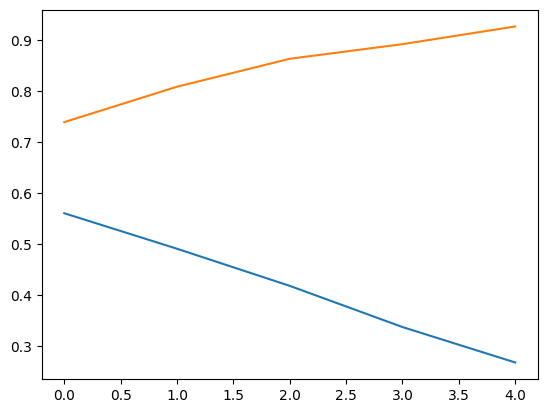

In [36]:
plt.plot(losses)
plt.plot(accuracies)

<ipython-input-39-03ba9ae5403d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


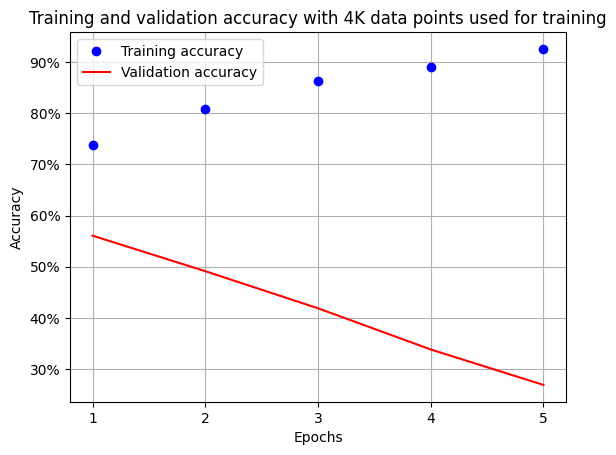

In [39]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.plot(epochs, accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, losses, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 4K data points used for training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.ylim(0.8,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()